In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

In [2]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [3]:
data1 = make_blobs(n_samples=n_samples,
                 n_features=n_features,
                 centers=n_cluster,
                 cluster_std=cluster_std,
                  random_state=0)

In [4]:
df1 = pd.DataFrame(data=data1[0],
                  columns=['Feature_'+str(i) 
                          for i in range(1, n_features+1)])

In [5]:
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.640102,10.374625,-8.234993,-11.042127
1,-2.915730,2.543132,-1.437456,10.543528
2,8.334100,-2.463637,4.568947,1.562196
3,9.829012,-1.996255,6.241186,3.003151
4,2.087035,9.586600,-8.737569,-7.771700


In [6]:
from itertools import combinations
lst_vars = list(combinations(df1.columns, 2))

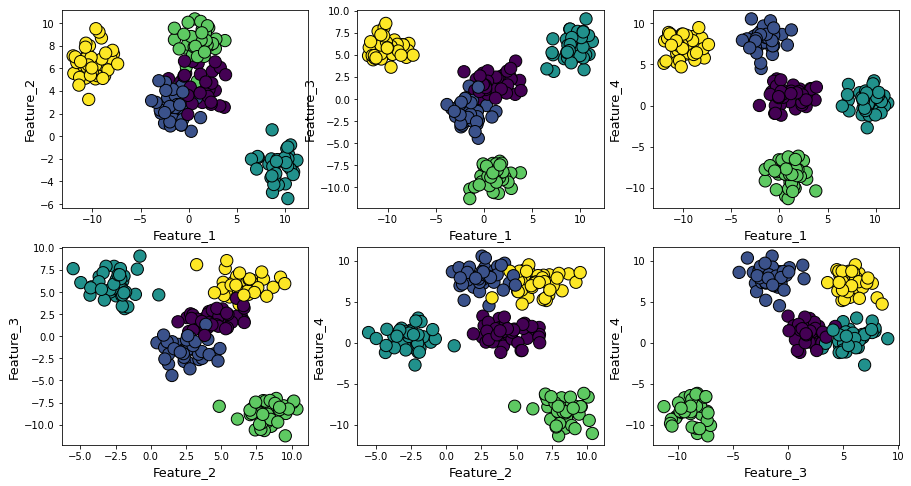

In [7]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

In [8]:
x=df1
y=data1[1]
x.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.640102,10.374625,-8.234993,-11.042127
1,-2.915730,2.543132,-1.437456,10.543528
2,8.334100,-2.463637,4.568947,1.562196
3,9.829012,-1.996255,6.241186,3.003151
4,2.087035,9.586600,-8.737569,-7.771700


In [9]:
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(x)

In [10]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    print("-"*100)

Score for number of cluster(s) 2: -31.467257344881908
Silhouette score for number of cluster(s) 2: 0.5153290781063632
Davies Bouldin score for number of cluster(s) 2: 0.5807853953190903
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -13.782208771189486
Silhouette score for number of cluster(s) 3: 0.6073502496694192
Davies Bouldin score for number of cluster(s) 3: 0.533645762870686
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -5.87627864728876
Silhouette score for number of cluster(s) 4: 0.657673943042736
Davies Bouldin score for number of cluster(s) 4: 0.5381433507403515
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -2.8464841815241417
Silhouette score for number of cluster(s) 5: 0.69034397107779
Davies Bouldin score for nu

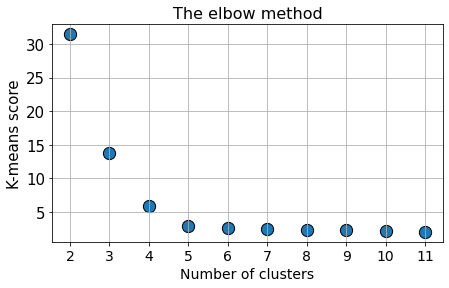

In [11]:
plt.figure(figsize=(7,4))
plt.title("The elbow method",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.savefig('Example', dpi=300)
plt.show()

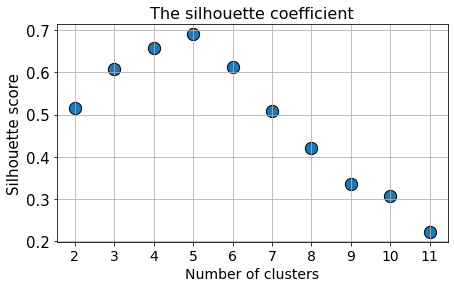

In [12]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.savefig('Example1', dpi=300)
plt.show()

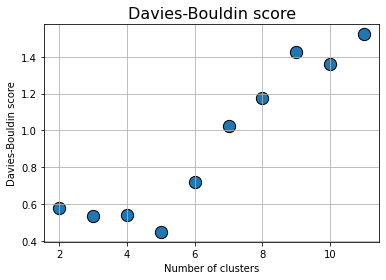

In [13]:
plt.title("Davies-Bouldin score",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel("Davies-Bouldin score")
plt.savefig('Example2', dpi=300)
plt.show()

In [14]:
number_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
optimal_number_of_clusters = number_of_clusters[km_silhouette.index(max(km_silhouette))]
km = KMeans(n_clusters=optimal_number_of_clusters, random_state=0).fit(X_scaled)
clusters = km.fit_predict(x)
print(optimal_number_of_clusters)

5


In [15]:
y = pd.Series(y)
df1['Plan_label'] = y
df1['Fact_label'] = clusters
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Plan_label,Fact_label
0,0.640102,10.374625,-8.234993,-11.042127,3,1
1,-2.915730,2.543132,-1.437456,10.543528,1,4
2,8.334100,-2.463637,4.568947,1.562196,2,3
3,9.829012,-1.996255,6.241186,3.003151,2,3
4,2.087035,9.586600,-8.737569,-7.771700,3,1


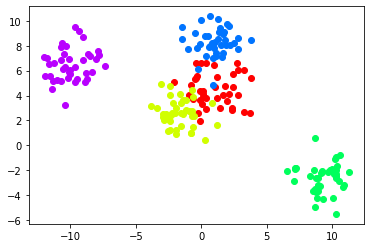

In [16]:
cmap = plt.cm.get_cmap('hsv', optimal_number_of_clusters+1)
for i in range (optimal_number_of_clusters):
    plt.scatter(df1.Feature_1[df1.Plan_label==i], df1.Feature_2[df1.Plan_label==i], color=cmap(i))
    plt.savefig('Результат 1', dpi=300)

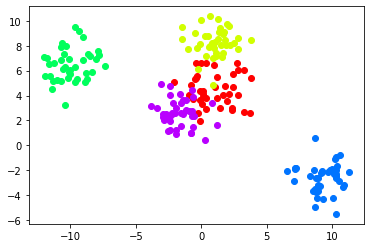

In [17]:
cmap = plt.cm.get_cmap('hsv', optimal_number_of_clusters+1)
for i in range (optimal_number_of_clusters):
    plt.scatter(df1.Feature_1[df1.Fact_label==i], df1.Feature_2[df1.Fact_label==i], color=cmap(i))
    plt.savefig('Результат 2', dpi=300)